# 코딩 준비
<pre>
참조 document : https://web.mit.edu/music21/doc/index.html
참조 예제 : https://bit.ly/2HQ9Q4J
참조 데이터 : https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/
악보 처리용 프로그램 추가 :https://musescore.org (MuseScore3인스톨)
악보를 보기 위한 setting :
us=music21.environment.UserSettings()
us["musescoreDirectPNGPath"]="C:/Program Files/MuseScore 3/bin/MuseScore3.exe"

pip install music21

<pre>
참조 document : https://web.mit.edu/music21/doc/index.html
참조 예제 : https://bit.ly/2HQ9Q4J
참조 데이터 : https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/
악보 처리용 프로그램 추가 :https://musescore.org (MuseScore3인스톨)
악보를 보기 위한 setting :
us=music21.environment.UserSettings()
us["musescoreDirectPNGPath"]="C:/Program Files/MuseScore 3/bin/MuseScore3.ex

import tensorflow as tf
print(tf.__version__)

In [63]:
import tensorflow as tf
import numpy as np
import music21
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow.keras.utils as utils
import os 

## RNN을 이용한 창작 (작곡) - 1
https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/

# 데이터 준비하기

**시퀀스 데이터 정의**

In [4]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
print("length of seq: {0}".format(len(seq)))

length of seq: 54


In [5]:
print(seq)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [9]:
note_seq = " ".join(seq)
print(note_seq)
m = music21.converter.parse("2/4 " + note_seq, format='tinyNotation')
m.show("midi")

g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4


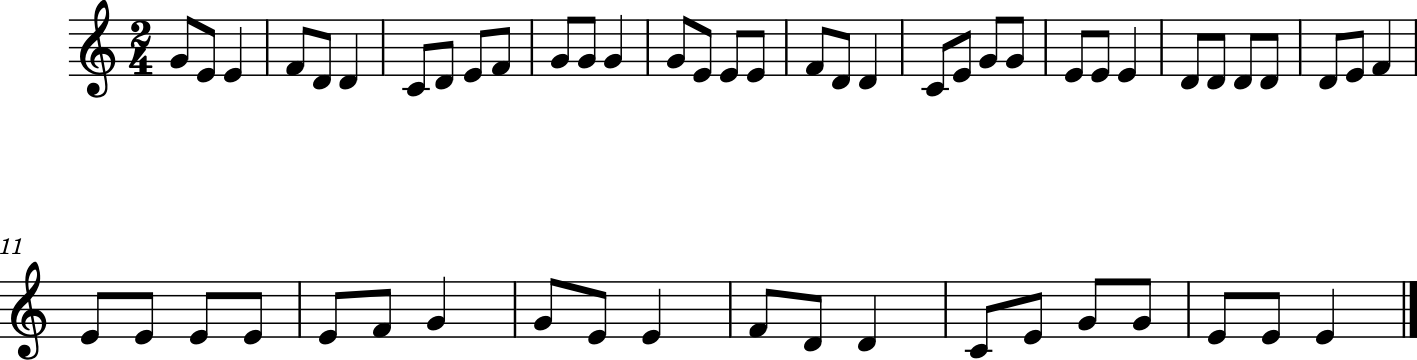

In [41]:
us=music21.environment.UserSettings()
us["musescoreDirectPNGPath"]="C:/Program Files/MuseScore 3/bin/MuseScore3.exe"
m.show()

In [10]:
note_seq

'g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4'

In [11]:
from keras_preprocessing.text import Tokenizer
t= Tokenizer()
t.fit_on_texts([seq])
encoded = t.texts_to_sequences([seq])[0]
print(encoded)
print(t.word_index)

[2, 1, 5, 4, 3, 6, 7, 3, 1, 4, 2, 2, 8, 2, 1, 1, 1, 4, 3, 6, 7, 1, 2, 2, 1, 1, 5, 3, 3, 3, 3, 3, 1, 9, 1, 1, 1, 1, 1, 4, 8, 2, 1, 5, 4, 3, 6, 7, 1, 2, 2, 1, 1, 5]
{'e8': 1, 'g8': 2, 'd8': 3, 'f8': 4, 'e4': 5, 'd4': 6, 'c8': 7, 'g4': 8, 'f4': 9}


**코드 사전 정의**

In [12]:
# (위에 없는 것도 포함됨)
code2idx = {'c4': 0, 'd4': 1, 'e4': 2, 'f4': 3, 'g4': 4, 'a4': 5, 'b4': 6,
            'c8': 7, 'd8': 8, 'e8': 9, 'f8': 10, 'g8': 11, 'a8': 12, 'b8': 13}

idx2code = {0: 'c4', 1: 'd4', 2: 'e4', 3: 'f4', 4: 'g4', 5: 'a4', 6: 'b4',
            7: 'c8', 8: 'd8', 9: 'e8', 10: 'f8', 11: 'g8', 12: 'a8', 13: 'b8'}

# 데이터셋 생성하기

**데이터셋 생성 함수**

In [13]:
note_seq

'g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4'

In [14]:
code2idx['g8']

11

In [16]:
print(seq)

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [33]:
for item in seq:
    print(code2idx[item], end='')
[code2idx[item] for item in seq]

11921081789101111411999108179111199288888939999910411921081791111992

[11,
 9,
 2,
 10,
 8,
 1,
 7,
 8,
 9,
 10,
 11,
 11,
 4,
 11,
 9,
 9,
 9,
 10,
 8,
 1,
 7,
 9,
 11,
 11,
 9,
 9,
 2,
 8,
 8,
 8,
 8,
 8,
 9,
 3,
 9,
 9,
 9,
 9,
 9,
 10,
 4,
 11,
 9,
 2,
 10,
 8,
 1,
 7,
 9,
 11,
 11,
 9,
 9,
 2]

In [18]:
print([code2idx[item] for item in seq])  #code2idx[item] 내용으로  / seq범위안에서 for문돌려  ?????

[11, 9, 2, 10, 8, 1, 7, 8, 9, 10, 11, 11, 4, 11, 9, 9, 9, 10, 8, 1, 7, 9, 11, 11, 9, 9, 2, 8, 8, 8, 8, 8, 9, 3, 9, 9, 9, 9, 9, 10, 4, 11, 9, 2, 10, 8, 1, 7, 9, 11, 11, 9, 9, 2]


In [ ]:
#11, 9, 2, 10, 8 이렇게 5개 자르고 =>  9, 2, 10, 8, 1 이렇게 5개 자르고  => 2, 10, 8, 1,7 이렇게  5개 자르고 

In [36]:
# seq를 학습시킬 데이터 셋으로 반환하는 함수 
# seq = 음계가 담긴 list, window_size: 독립변수의 갯수 
def seq2dataset(seq,window_size):        #window_size  (독립변수)가 4개면   5개 씩 잘라  ***************
    dataset = []
    for i in range(len(seq)-window_size):   #Dense 를 써야하기 때문에  IV의 갯수가 똑같아야
        subset = seq[i : (i+window_size+1)]   #window_size가4면   5개가 되도록 자름
        encoded = [code2idx[item] for item in subset]    #g8대신 11, e8대신 9가 대치되어야 
        dataset.append(encoded)
    return np.array(dataset)

In [37]:
print(seq[0:10])
print(seq2dataset(seq[0:10],4))   #갯수가 53이면 inex는54까지 있다         #????????????????

['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8']
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]]


**생성**

In [39]:
n_steps = 4  #4개씩 학습 (IV 갯수)
n_inputs =1 
dataset = seq2dataset(seq=seq, window_size = n_steps)
print(dataset[:2])  #0,1번방 
dataset.shape

[[11  9  2 10  8]
 [ 9  2 10  8  1]]


(50, 5)

## 독립변수 (X), 종속변수 (Y)로 분리 

In [42]:
x_train = dataset [:,:-1]
y_train = dataset [:,-1]
print(dataset[0])
print(x_train[0],y_train[0])
print(x_train.shape,y_train.shape)

[11  9  2 10  8]
[11  9  2 10] 8
(50, 4) (50,)


In [44]:
code2idx

{'c4': 0,
 'd4': 1,
 'e4': 2,
 'f4': 3,
 'g4': 4,
 'a4': 5,
 'b4': 6,
 'c8': 7,
 'd8': 8,
 'e8': 9,
 'f8': 10,
 'g8': 11,
 'a8': 12,
 'b8': 13}

- **정규화 시킬 때 나눌 값:  code2idx의 제일 큰 values 값**

In [46]:
# 정규화 시킬 때 나눌 값:  code2idx의 제일 큰 values 값
max_idx_value = max(code2idx.values())       #dictionary는 key값을 한다
max_idx_value

13

## 독립변수 정규화 

In [47]:
print('정규화 전 x_train[:2]', x_train[:2],sep="\n")

정규화 전 x_train[:2]
[[11  9  2 10]
 [ 9  2 10  8]]


In [48]:
x_train = x_train / float(max_idx_value)
print("정규화 후 x_train[:2]", x_train[:2],sep='\n')

정규화 후 x_train[:2]
[[0.84615385 0.69230769 0.15384615 0.76923077]
 [0.69230769 0.15384615 0.76923077 0.61538462]]


## 독립변수의 shape변환 (샘플수,nsteps -> 샘플수, nsteps,1)

In [49]:
x_train.shape

(50, 4)

In [52]:
x_train = x_train.reshape( x_train.shape[0], x_train.shape[1],1 )
x_train.shape 

(50, 4, 1)

## 종속변수 (라벨값)의 원핫인코딩

In [53]:
y_train

array([ 8,  1,  7,  8,  9, 10, 11, 11,  4, 11,  9,  9,  9, 10,  8,  1,  7,
        9, 11, 11,  9,  9,  2,  8,  8,  8,  8,  8,  9,  3,  9,  9,  9,  9,
        9, 10,  4, 11,  9,  2, 10,  8,  1,  7,  9, 11, 11,  9,  9,  2])

In [54]:
y_train = utils.to_categorical (y_train)
y_train

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [55]:
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

# 모델 구성하기 

In [56]:
model = Sequential()
model.add(LSTM(
    units=128,
    kernel_initializer='glorot_normal',
    bias_initializer='zero',
    batch_input_shape=(1, n_steps, n_inputs), 
    stateful=True
))
model.add(Dense(
    units=one_hot_vec_size, 
    kernel_initializer='glorot_normal',
    bias_initializer='zero',    
    activation='softmax'
))

# 모델 학습과정 설정하기

In [58]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 모델 학습시키기

**loss, accuracy 이력 클래스 정의**

In [65]:
class LossHistory(tf.keras.callbacks.Callback):
    def __init__(self):        #  def init(self) 생성자 함수가 아니기에 반드시 '호출'   #생성자 함수는  def __init__(self)
        self.epoch = 0
        self.losses = []
        self.accuracy = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        if self.epoch % 100 == 0:
            print("epoch: {0} - loss: {1:8.6f}, accuracy:{2:8.6f}".format(self.epoch, logs.get('loss'), logs.get('accuracy')))  
                                    ##8.6f  총 8자리 소숫점 뒤 6자리
            
        self.epoch += 1

**학습**

In [66]:
num_epochs = 1500          ###1500번 학습 
history = LossHistory()  # 손실 이력 객체 생성

for epoch_idx in range(num_epochs + 1):
    model.fit(
        x=x_train,
        y=y_train,
        epochs=1,
        batch_size=1,
        verbose=0,
        shuffle=False,
        callbacks=[history]
    )
    if history.losses[-1] < 1e-5:     #0.00001보다 작으면 break,  작지 않으면 계속 for문 돌아서 1500번 학습 
        print("epoch: {0} - loss: {1:8.6f}".format(epoch_idx, history.losses[-1]))
        model.reset_states()    
        break
    model.reset_states()

epoch: 0 - loss: 2.377825, accuracy:0.180000
epoch: 100 - loss: 0.956226, accuracy:0.660000
epoch: 200 - loss: 0.004324, accuracy:1.000000
epoch: 300 - loss: 0.001800, accuracy:1.000000
epoch: 400 - loss: 0.000099, accuracy:1.000000
epoch: 490 - loss: 0.000010


In [60]:
print("{:.5f}".format(1e-5))

0.00001


# 학습과정 살펴보기

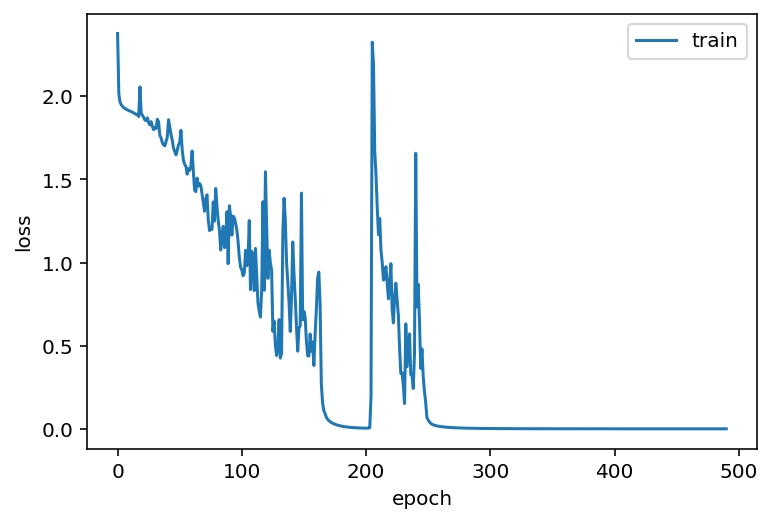

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# 모델 평가하기 

In [68]:
model.evaluate(x_train, y_train, batch_size=1)
model.reset_states()

50/50 [==============================] - 1s 834us/step - loss: 9.6773e-06 - accuracy: 1.0000


# 모델 사용하기

In [70]:
x_train[0].shape   #(4,1) 그러나 1행 몇을 넣어야

(4, 1)

## 바로 다음 스텝 예측 

In [71]:
x_train[0]
temp = x_train[0].reshape(1,4,1)
temp

array([[[0.84615385],
        [0.69230769],
        [0.15384615],
        [0.76923077]]])

In [72]:
idx = np.argmax(model.predict(temp))
idx

8

In [73]:
idx2code[idx]

'd8'

## 곡 전체 예측

In [74]:
pred_count = 50 #최대 예측 갯수
seq_in = ['g8', 'c8', 'f4', 'e8']
seq_out = seq_in
seq_in = [code2idx[note] / float(max_idx_value) for note in seq_in]  # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, n_steps, n_inputs))  # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()

print("full song prediction : ")

for note in seq_out:
    print(note, end=" ")

full song prediction : 
g8 c8 f4 e8 d4 c8 d8 e8 f8 g8 g8 g4 g8 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 

In [ ]:
# 딥러닝했다고 했을때 '어떤 데이터를 넣는지   확인

In [75]:
# 나비야 초반: 'g8', 'e8','e4','f8'
note_seq = ""
for note in seq_out:
    note_seq += note + " "
    
conv_midi = music21.converter.subConverters.ConverterMidi()

m = music21.converter.parse("2/4 " + note_seq, format='tinyNotation')

m.show("midi")